In [1]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 8),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

In [2]:
#import dependencies
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import measure, io, color
import scipy.ndimage as ndi

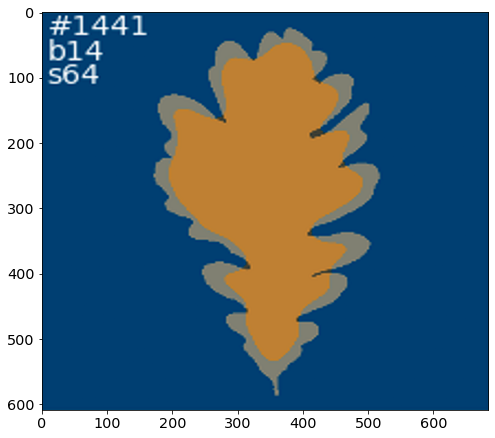

In [3]:
#image reading
img = mpimg.imread('imgs/lab6_leaf.png')
plt.imshow(img)

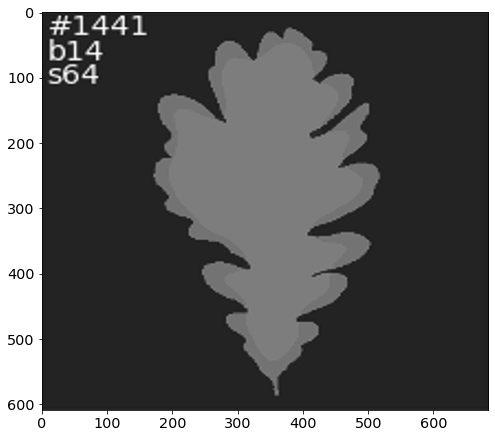

In [4]:
#converting to grayscale
img = color.rgb2gray(img)
plt.imshow(img, cmap=plt.cm.gray)

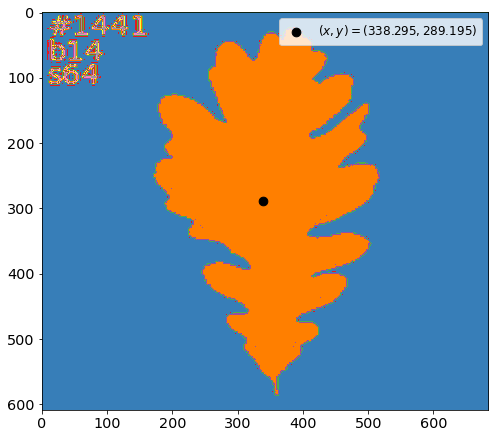

In [5]:
#coordinates of the center of mass
cy, cx = ndi.center_of_mass(img)

plt.imshow(img, cmap='Set1') # show the leaf
plt.scatter(cx, cy, marker='.', c='black',s=300, label=(fr'$(x,y)=({np.round(cx,3)},{np.round(cy,3)})$')) # show its center
plt.legend()
plt.show()


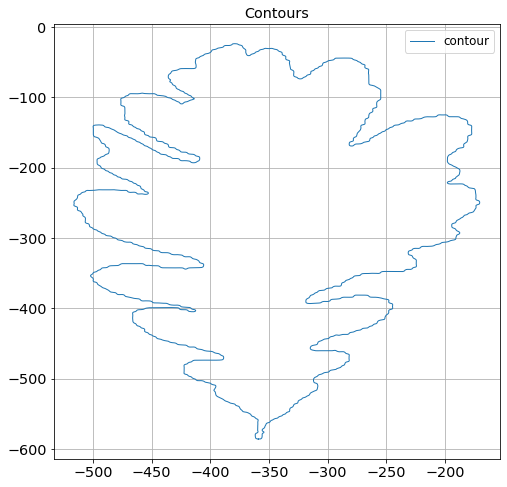

In [6]:
#contour imaging
contours = measure.find_contours(img, 0.4)
contour = max(contours, key=len)
plt.plot(-contour[::,1], -contour[::,0], linewidth=1, label='contour')
plt.title('Contours')
plt.grid()
plt.legend()
plt.show()


In [7]:
#shifting center to (0,0)
contour[::,1] -= cx # demean X
contour[::,0] -= cy # demean Y

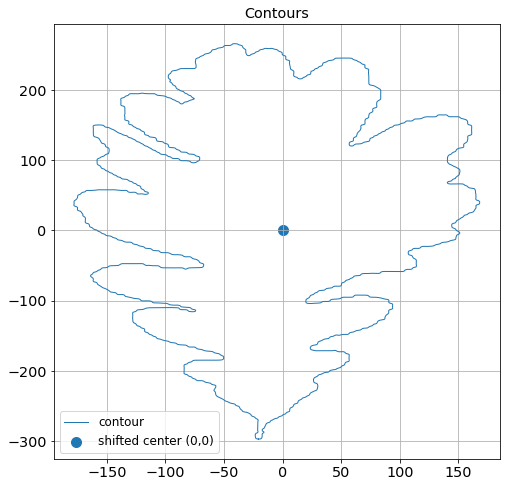

In [8]:
# checking if we succeeded to move the center to (0,0)
plt.plot(-contour[::,1], -contour[::,0], linewidth=1, label='contour')
plt.grid()
plt.scatter(0, 0, label='shifted center (0,0)')
plt.title('Contours')
plt.legend()
plt.show()



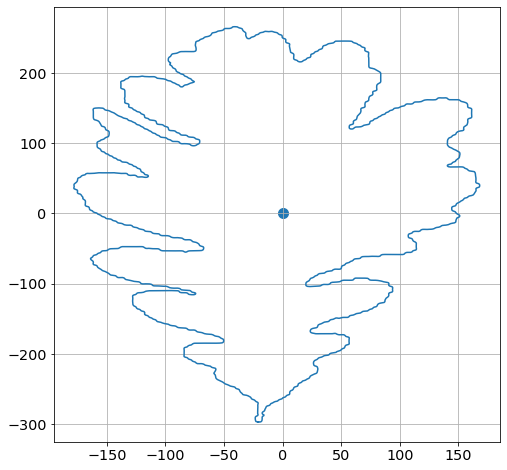

In [39]:
pylab.rcParams['figure.figsize'] = (8, 8)
plt.plot(-contour[::,1], -contour[::,0])
plt.grid()
plt.scatter(0, 0)
p
plt.show()


In [9]:
def add_rad(y):
    if y >= 0:
        return -np.pi/2
    else:
        return np.pi/2

#cartesian coords to polar
def cart2pol(x, y):
    theta = np.arctan2(y,x)
    rho = np.sqrt(x**2+y**2)
    return theta,rho

In [10]:
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

In [11]:
polar_contour_pos = polar_contour[polar_contour[::,0]<0]

In [12]:
polar_contour_pos

array([[-1.12609265e-03,  2.62408619e+02],
       [-4.91954126e-03,  2.61808076e+02],
       [-4.94834927e-03,  2.61804811e+02],
       ...,
       [-3.13638150e+00,  2.48601932e+02],
       [-3.14035854e+00,  2.49195282e+02],
       [-3.14040692e+00,  2.49210086e+02]])

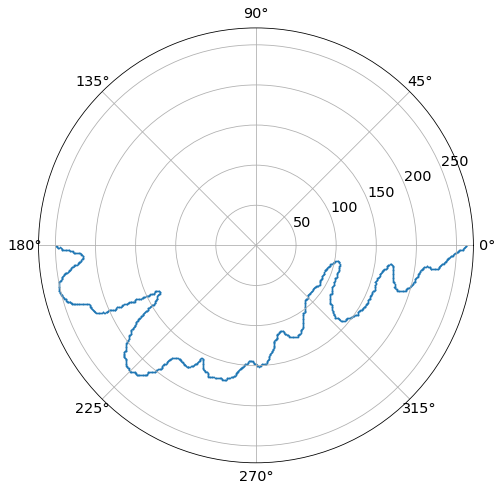

In [13]:
plt.subplot(111, projection='polar')
plt.scatter(polar_contour_pos[::,0], polar_contour_pos[::,1], s =0.5)

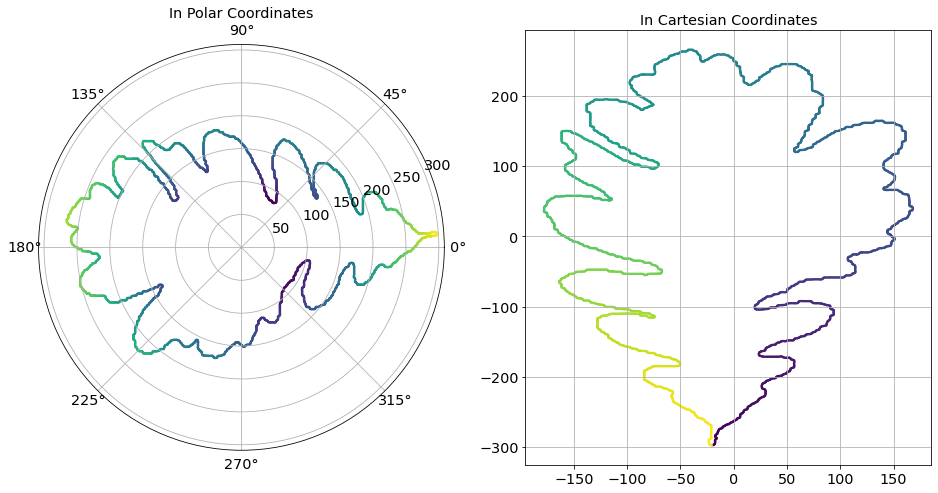

In [14]:
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

pylab.rcParams['figure.figsize'] = (16, 8)

ax1 = plt.subplot(121,projection='polar')
ax1.scatter(polar_contour[::,0], polar_contour[::,1], c=polar_contour[::,1], s=2)
ax1.set_title('In Polar Coordinates')
ax1.grid('on')
ax2 = plt.subplot(122)
ax2.scatter(-contour[::,1], # x axis is radians
              -contour[::,0], # y axis is distance from center
              linewidth=1, s=2, # small points, w/o borders
              c=range(len(contour))) # continuous coloring (so that plots match)
ax2.set_title('In Cartesian Coordinates')
ax2.grid()

In [4]:
import numpy as np

G = np.array([[0.05,0,0.05,0.02,0.05,0.02,0.04,0.04],
              [0.04,0.02,0,0,0.07,0,0.02,0],
              [0.04,0.02,0,0,0,0,0,0.02],
              [0.02,0,0,0,0,0,0.02,0],
              [0.05,0.04,0,0,0,0,0.02,0.05],
              [0,0.02,0.02,0.02,0,0.02,0.02,0],
              [0.02,0.02,0,0,0,0.05,0,0.02],
              [0.02,0.02,0.02,0.02,0.02,0,0,0.02]])

entropy = 0
for i in range(len(G)):
    for j in range(len(G)):
        if G[i][j] != 0:
            entropy -= G[i][j]*np.log2(G[i][j])

entropy

5.0900786024577265

In [5]:
2*np.log2(8)

6.0

In [6]:
pp = np.array([0.266,0.125,0.094,0.047,0.156,0.078,0.109,0.175])

-np.sum(pp*np.log2(pp))

2.9049701521974587

In [9]:
clust1 = np.array([[45,10,3],
                   [0,50,0],
                   [12,0,30]])

TP = 0
for i in range(len(clust1)):
    for j in range(len(clust1)):
        print(clust1[i][j]*(clust1[i][j]-1)/2)
        TP += clust1[i][j]*(clust1[i][j]-1)/2

TP

990.0
45.0
3.0
0.0
1225.0
0.0
66.0
0.0
435.0


2764.0

In [14]:
FN = -TP

for j in range(len(clust1)):
    print(np.sum(clust1[:,j])*(np.sum(clust1[:,j])-1)/2)
    FN += np.sum(clust1[:,j])*(np.sum(clust1[:,j])-1)/2

FN

1596.0
1770.0
528.0


1130.0

In [18]:
FP = -TP

for i in range(len(clust1)):
    print(np.sum(clust1[i,:])*(np.sum(clust1[i,:])-1)/2)
    FP += np.sum(clust1[i,:])*(np.sum(clust1[i,:])-1)/2

FP

1653.0
1225.0
861.0


975.0

In [22]:
TP = np.sum(clust1*(clust1-1)/2)

TP

2764.0

In [24]:
N=np.sum(clust1)*(np.sum(clust1)-1)/2

In [27]:
TN = N-TP-FP-FN
TN

6306.0

In [26]:
#Jaccard
TP/(TP+FP+FN)

0.5676730334771001

In [28]:
#Rend
(TP+TN)/N

0.8116331096196868

In [29]:
#FM
TP/np.sqrt((TP+FN)*(TP+FP))

0.7243731306230992

In [33]:
clust1 = np.array([[40,10,0],
                   [5,44,0],
                   [12,6,33]])

TP = np.sum(clust1*(clust1-1)/2)

TP

2390.0

In [34]:
FN = -TP

for j in range(len(clust1)):
    print(np.sum(clust1[:,j])*(np.sum(clust1[:,j])-1)/2)
    FN += np.sum(clust1[:,j])*(np.sum(clust1[:,j])-1)/2

FN

1596.0
1770.0
528.0


1504.0

In [35]:
FP = -TP

for i in range(len(clust1)):
    print(np.sum(clust1[i,:])*(np.sum(clust1[i,:])-1)/2)
    FP += np.sum(clust1[i,:])*(np.sum(clust1[i,:])-1)/2

FP

1225.0
1176.0
1275.0


1286.0

In [36]:
TN = N-TP-FP-FN
TN

5995.0

In [37]:
#Jaccard
TP/(TP+FP+FN)

0.4613899613899614

In [38]:
#Rend
(TP+TN)/N

0.7503355704697987

In [39]:
#FM
TP/np.sqrt((TP+FN)*(TP+FP))

0.6317018896065165

In [41]:
si = np.array([0.75,0.75,0.5,0.5])

np.sum(si.T*si)/2

0.8125